# Machine Learning Case Study

### Problem Statement

This case consists of a supervised learning example, similar to what we are
working with on a daily basis in Klarna . Your task is to predict the probability
of default for the datapoints where the default variable is not set. The
answer should contain the resulting predictions in a csv file with two columns,
uuid and pd (probability of default==1). Once done expose this model
with an API Endpoint on a cloud provider of your choice. Bonus points if you
use AWS. Send us the details on how to query the endpoint, attach code used
for modelling, a short (max one page) explanation of your model and how you
validated it.

We mostly use Python for modeling at Klarna but you are free to use other
languages if you prefer as long as they are easily obtainable for us.
Don’t spend too much time on the prediction results. We evaluate how you
structure and reason about the problem rather than the predictive accuracy of
your model.

### Dataset

The data is located in the attached file dataset.csv. This is a simple semicolon
separated CSV file containing a unique id, the target variable default and a
number of features with somewhat different datatypes and meanings. Missing
values are denoted as NA in the set. Here is a list of the variables and their
types:

- uuid: text
- default: categorical
- account_amount_added_12_24m: numeric
- account_days_in_dc_12_24m: numeric
- account_days_in_rem_12_24m: numeric
- account_days_in_term_12_24m: numeric
- account_incoming_debt_vs_paid_0_24m: numeric
- account_status: categorical
- account_worst_status_0_3m: categorical
- account_worst_status_12_24m: categorical
- account_worst_status_3_6m: categorical
- account_worst_status_6_12m: categorical
- age: numeric
- avg_payment_span_0_12m: numeric
- avg_payment_span_0_3m: numeric
- merchant_category: categorical
- merchant_group: categorical
- has_paid: boolean
- max_paid_inv_0_12m: numeric
- max_paid_inv_0_24m: numeric
- name_in_email: categorical
- num_active_div_by_paid_inv_0_12m: numeric
- num_active_inv: numeric
- num_arch_dc_0_12m: numeric
- num_arch_dc_12_24m: numeric
- num_arch_ok_0_12m: numeric
- num_arch_ok_12_24m: numeric
- num_arch_rem_0_12m: numeric
- num_arch_written_off_0_12m: numeric
- num_arch_written_off_12_24m: numeric
- num_unpaid_bills: numeric
- status_last_archived_0_24m: categorical
- status_2nd_last_archived_0_24m: categorical
- status_3rd_last_archived_0_24m: categorical
- status_max_archived_0_6_months: categorical
- status_max_archived_0_12_months: categorical
- status_max_archived_0_24_months: categorical
- recovery_debt: numeric
- sum_capital_paid_account_0_12m: numeric
- sum_capital_paid_account_12_24m: numeric
- sum_paid_inv_0_12m: numeric
- time_hours: numeric
- worst_status_active_inv: categorical

# Data Exploration and Preparation

## Loading the data

- This section includes loading of the data, understanding basic description of the data; followed by cleanup & imputations if required.

In [1]:
# Importing the required packages

import random
import numpy as np
import pandas as pd
from matplotlib import pyplot
import seaborn as sns
from collections import Counter

%matplotlib inline

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
import category_encoders as ce


# from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,confusion_matrix,roc_auc_score,f1_score, precision_recall_curve,auc
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, cross_validate, KFold, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from imblearn.combine import SMOTEENN
from IPython.display import display
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings('ignore')

import pickle

In [2]:
# to print all the columns
# pd.set_option('display.max_columns', None)

In [3]:
# Loading the dataset and previewing the shape of the dataframe

account_data = pd.read_csv('../ML_Case_Study_local/dataset.csv', sep=';')
print("The shape of the sales data is:",account_data.shape)

The shape of the sales data is: (99976, 43)


In [4]:
# Previewing the data

account_data.head(5)

,uuid,default,account_amount_added_12_24m,account_days_in_dc_12_24m,account_days_in_rem_12_24m,account_days_in_term_12_24m,account_incoming_debt_vs_paid_0_24m,account_status,account_worst_status_0_3m,account_worst_status_12_24m,...,status_3rd_last_archived_0_24m,status_max_archived_0_6_months,status_max_archived_0_12_months,status_max_archived_0_24_months,recovery_debt,sum_capital_paid_account_0_12m,sum_capital_paid_account_12_24m,sum_paid_inv_0_12m,time_hours,worst_status_active_inv
0,63f69b2c-8b1c-4740-b78d-52ed9a4515ac,0.0,0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,...,1,1,1,1,0,0,0,178839,9.653333,1.0
1,0e961183-8c15-4470-9a5e-07a1bd207661,0.0,0,0.0,0.0,0.0,NaN,1.0,1.0,1.0,...,1,1,2,2,0,0,0,49014,13.181389,NaN
2,d8edaae6-4368-44e0-941e-8328f203e64e,0.0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,1,1,2,2,0,0,0,124839,11.561944,1.0
3,0095dfb6-a886-4e2a-b056-15ef45fdb0ef,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,1,1,0,0,0,324676,15.751111,1.0
4,c8f8b835-5647-4506-bf15-49105d8af30b,0.0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,0,1,1,1,0,0,0,7100,12.698611,NaN


## Variable Identification

In [5]:
print("Looking at individual features:\n")
# account_data.info()
account_data.dtypes

Looking at individual features:



uuid                                    object
default                                float64
account_amount_added_12_24m              int64
account_days_in_dc_12_24m              float64
account_days_in_rem_12_24m             float64
account_days_in_term_12_24m            float64
account_incoming_debt_vs_paid_0_24m    float64
account_status                         float64
account_worst_status_0_3m              float64
account_worst_status_12_24m            float64
account_worst_status_3_6m              float64
account_worst_status_6_12m             float64
age                                      int64
avg_payment_span_0_12m                 float64
avg_payment_span_0_3m                  float64
merchant_category                       object
merchant_group                          object
has_paid                                  bool
max_paid_inv_0_12m                     float64
max_paid_inv_0_24m                     float64
name_in_email                           object
num_active_di

In [6]:
print("Unique values in target are:{}".format(account_data['default'].unique()))
# print(Counter(account_data['default']))
# 0.0: 88688, 1.0: 1288
print("Count of unique values in target are:{}".format(account_data['default'].isnull().sum()))

Unique values in target are:[ 0.  1. nan]
Count of unique values in target are:10000


In [7]:
# Checking for unique values

account_data.nunique()

uuid                                   99976
default                                    2
account_amount_added_12_24m            23721
account_days_in_dc_12_24m                127
account_days_in_rem_12_24m               282
account_days_in_term_12_24m               64
account_incoming_debt_vs_paid_0_24m    23674
account_status                             4
account_worst_status_0_3m                  4
account_worst_status_12_24m                4
account_worst_status_3_6m                  4
account_worst_status_6_12m                 4
age                                       79
avg_payment_span_0_12m                  7939
avg_payment_span_0_3m                   2256
merchant_category                         57
merchant_group                            12
has_paid                                   2
max_paid_inv_0_12m                     12497
max_paid_inv_0_24m                     12932
name_in_email                              8
num_active_div_by_paid_inv_0_12m         861
num_active

In [8]:
# looking at nan values accross dataset

account_data.isnull().sum()

uuid                                       0
default                                10000
account_amount_added_12_24m                0
account_days_in_dc_12_24m              11836
account_days_in_rem_12_24m             11836
account_days_in_term_12_24m            11836
account_incoming_debt_vs_paid_0_24m    59315
account_status                         54373
account_worst_status_0_3m              54373
account_worst_status_12_24m            66761
account_worst_status_3_6m              57702
account_worst_status_6_12m             60350
age                                        0
avg_payment_span_0_12m                 23836
avg_payment_span_0_3m                  49305
merchant_category                          0
merchant_group                             0
has_paid                                   0
max_paid_inv_0_12m                         0
max_paid_inv_0_24m                         0
name_in_email                              0
num_active_div_by_paid_inv_0_12m       22939
num_active

In [9]:
# finding frequencies in categorical variables
categorical = [var for var in account_data.columns if account_data[var].dtype=='O']

print("Number of categorical variables:{}".format(len(categorical)))
print("The categorical variables are:",categorical)

for i in categorical:
    print(account_data[i].value_counts)

Number of categorical variables:4
The categorical variables are: ['uuid', 'merchant_category', 'merchant_group', 'name_in_email']
<bound method IndexOpsMixin.value_counts of 0        63f69b2c-8b1c-4740-b78d-52ed9a4515ac
1        0e961183-8c15-4470-9a5e-07a1bd207661
2        d8edaae6-4368-44e0-941e-8328f203e64e
3        0095dfb6-a886-4e2a-b056-15ef45fdb0ef
4        c8f8b835-5647-4506-bf15-49105d8af30b
                         ...                 
99971    5c03bc63-ea65-4ffd-aa7b-95ea9a46db34
99972    f8db22f4-9819-420c-abbc-9ddf1843176e
99973    b22e21ea-b1b2-4df3-b236-0ff6d5fdc0d8
99974    bafcab15-9898-479c-b729-c9dda7edb78f
99975    ac88f18c-96a6-49bc-9e9d-a780225914af
Name: uuid, Length: 99976, dtype: object>
<bound method IndexOpsMixin.value_counts of 0                               Dietary supplements
1                                 Books & Magazines
2                         Diversified entertainment
3                         Diversified entertainment
4        Electronic equipm

In [10]:
# checking for duplicate records

print("Number of duplicate records are:{}".format(account_data.duplicated().sum()))

Number of duplicate records are:0


In [11]:
account_data.describe().T

,count,mean,std,min,25%,50%,75%,max
default,89976.0,0.014315,0.118786,0.000000,0.000000,0.000000,0.000000,1.000000e+00
account_amount_added_12_24m,99976.0,12255.149516,35481.483737,0.000000,0.000000,0.000000,4937.250000,1.128775e+06
account_days_in_dc_12_24m,88140.0,0.223043,5.808117,0.000000,0.000000,0.000000,0.000000,3.650000e+02
account_days_in_rem_12_24m,88140.0,5.044622,22.863971,0.000000,0.000000,0.000000,0.000000,3.650000e+02
account_days_in_term_12_24m,88140.0,0.286896,2.929910,0.000000,0.000000,0.000000,0.000000,9.700000e+01
account_incoming_debt_vs_paid_0_24m,40661.0,1.331292,26.482299,0.000000,0.000000,0.152082,0.662952,3.914000e+03
account_status,45603.0,1.042168,0.202713,1.000000,1.000000,1.000000,1.000000,4.000000e+00
account_worst_status_0_3m,45603.0,1.172905,0.420142,1.000000,1.000000,1.000000,1.000000,4.000000e+00
account_worst_status_12_24m,33215.0,1.337348,0.575043,1.000000,1.000000,1.000000,2.000000,4.000000e+00
account_worst_status_3_6m,42274.0,1.185291,0.443309,1.000000,1.000000,1.000000,1.000000,4.000000e+00


In [12]:
account_data.isnull().sum()

uuid                                       0
default                                10000
account_amount_added_12_24m                0
account_days_in_dc_12_24m              11836
account_days_in_rem_12_24m             11836
account_days_in_term_12_24m            11836
account_incoming_debt_vs_paid_0_24m    59315
account_status                         54373
account_worst_status_0_3m              54373
account_worst_status_12_24m            66761
account_worst_status_3_6m              57702
account_worst_status_6_12m             60350
age                                        0
avg_payment_span_0_12m                 23836
avg_payment_span_0_3m                  49305
merchant_category                          0
merchant_group                             0
has_paid                                   0
max_paid_inv_0_12m                         0
max_paid_inv_0_24m                         0
name_in_email                              0
num_active_div_by_paid_inv_0_12m       22939
num_active

In [13]:
# Dropping redundant and unnecessary columns

col_to_drop = ['name_in_email', 'status_max_archived_0_6_months','status_max_archived_0_12_months','avg_payment_span_0_3m', 'max_paid_inv_0_12m']
account_data.drop(col_to_drop, axis=1, inplace=True)

# Converting boolean column to integer

account_data['has_paid'] = account_data['has_paid'].astype(int)

#### Initial Observations:

- There are a total of 99976 records in the dataset with 10000 records whose default value is unknown which becomes our test set.
- There are a total of 42 features and 1 target variable in the dataset, a dimensionality reduction may be required to reduce the number of features.
- There are no duplicate records.
- There are no negative values as shown from the min values.
- The columns have different ranges and magnitudes which suggests that scaling could be required if distance based algorithms are used.
- There is definite skewness in few of the variables since there is a jump from min 0 compared to max.
- Few of the columns have very high count of NaNs compared to others

## Missing value treatment

In [14]:
# Checking for percentage of missing value in each column

# round(account_data.isnull().sum()/len(account_data)*100,2)

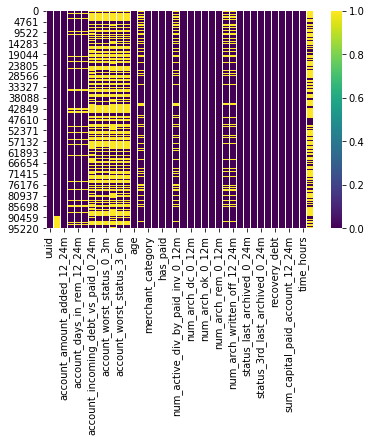

In [15]:
# Visualizing missing values across data

sns.heatmap(account_data.isnull(), cmap='viridis');

In [16]:
# Finding number of categories in numeric columns

num_nul_cols = ['avg_payment_span_0_12m', 'account_incoming_debt_vs_paid_0_24m',
               'account_days_in_dc_12_24m', 'account_days_in_rem_12_24m', 'account_days_in_term_12_24m', 'num_active_div_by_paid_inv_0_12m']

# num_nul_cols = X_train.select_dtypes(include=['int64','float64']).columns
# num_cols_x_train = X_train._get_numeric_data()

for ColName in num_nul_cols:
    print("{} = {}".format(ColName,account_data[ColName].nunique()))
    print(account_data[ColName].value_counts(dropna=False))

avg_payment_span_0_12m = 7939
NaN          23836
14.000000     2144
13.000000     1833
15.000000     1281
12.000000     1227
             ...  
5.913043         1
9.725191         1
10.611111        1
6.822222         1
14.792453        1
Name: avg_payment_span_0_12m, Length: 7940, dtype: int64
account_incoming_debt_vs_paid_0_24m = 23674
NaN          59315
0.000000     13072
8.034426        57
0.004301        18
0.000022        17
             ...  
0.308098         1
0.586757         1
11.695556        1
0.268112         1
0.900313         1
Name: account_incoming_debt_vs_paid_0_24m, Length: 23675, dtype: int64
account_days_in_dc_12_24m = 127
0.0      87879
NaN      11836
9.0         11
28.0        10
67.0         9
         ...  
113.0        1
106.0        1
362.0        1
143.0        1
159.0        1
Name: account_days_in_dc_12_24m, Length: 128, dtype: int64
account_days_in_rem_12_24m = 282
0.0      78522
NaN      11836
1.0        529
2.0        315
21.0       258
         ...  
3

In [17]:
# Printing percentage of missing values in numerical varibles
account_data[num_nul_cols].isnull().sum()*100/len(account_data)

avg_payment_span_0_12m                 23.841722
account_incoming_debt_vs_paid_0_24m    59.329239
account_days_in_dc_12_24m              11.838841
account_days_in_rem_12_24m             11.838841
account_days_in_term_12_24m            11.838841
num_active_div_by_paid_inv_0_12m       22.944507
dtype: float64

- From the numeric columns, we see that the percentage of missing values in these are below 25% for all expect for account_incoming_debt_vs_paid_0_24m. Hence, we chose to perform mean imputation for all these and chose to not drop the accoutn_incoming_debt_vs_paid_0_24m feature as it seems to be a useful feature for our prediction.

In [18]:
# Using mean imputation to impute float variables

account_data[num_nul_cols] = account_data[num_nul_cols].fillna(account_data[num_nul_cols].mean())

In [19]:
# Finding number of categories in category columns

print("Number of Categories in: ")

cat_nul_cols = ['account_status', 'account_worst_status_0_3m', 'account_worst_status_12_24m',
            'account_worst_status_3_6m', 'account_worst_status_6_12m', 'num_arch_written_off_0_12m',
            'num_arch_written_off_12_24m', 'worst_status_active_inv']

for ColName in cat_nul_cols:
    print("{} = {}".format(ColName,account_data[ColName].nunique()))
    print(account_data[ColName].value_counts(dropna=False))

Number of Categories in: 
account_status = 4
NaN    54373
1.0    43693
2.0     1900
3.0        7
4.0        3
Name: account_status, dtype: int64
account_worst_status_0_3m = 4
NaN    54373
1.0    38375
2.0     6678
3.0      443
4.0      107
Name: account_worst_status_0_3m, dtype: int64
account_worst_status_12_24m = 4
NaN    66761
1.0    23527
2.0     8433
3.0      993
4.0      262
Name: account_worst_status_12_24m, dtype: int64
account_worst_status_3_6m = 4
NaN    57702
1.0    35254
2.0     6357
3.0      513
4.0      150
Name: account_worst_status_3_6m, dtype: int64
account_worst_status_6_12m = 4
NaN    60350
1.0    30703
2.0     8025
3.0      688
4.0      210
Name: account_worst_status_6_12m, dtype: int64
num_arch_written_off_0_12m = 2
0.0    81888
NaN    18078
1.0       10
Name: num_arch_written_off_0_12m, dtype: int64
num_arch_written_off_12_24m = 3
0.0    81887
NaN    18078
1.0        9
2.0        2
Name: num_arch_written_off_12_24m, dtype: int64
worst_status_active_inv = 3
NaN    6

In [20]:
# Printing percentage of missing values in categorical varibles
account_data[cat_nul_cols].isnull().sum()*100/len(account_data)

account_status                 54.386053
account_worst_status_0_3m      54.386053
account_worst_status_12_24m    66.777026
account_worst_status_3_6m      57.715852
account_worst_status_6_12m     60.364487
num_arch_written_off_0_12m     18.082340
num_arch_written_off_12_24m    18.082340
worst_status_active_inv        69.531688
dtype: float64

In [21]:
# Using Frequency imputation to impute the categorical variables with the most frequent category

def fillna(col):
    col.fillna(col.value_counts().index[0], inplace=True)
    return col

account_data[['account_status','num_arch_written_off_0_12m','num_arch_written_off_12_24m']]=account_data[['account_status','num_arch_written_off_0_12m','num_arch_written_off_12_24m']].apply(lambda col:fillna(col))
account_data.drop(['account_worst_status_0_3m','account_worst_status_12_24m','account_worst_status_3_6m',
                         'account_worst_status_6_12m','worst_status_active_inv'], inplace=True, axis=1)

- For the categorical variables with missing values greater than 50 percentage we chose to drop except for account_status

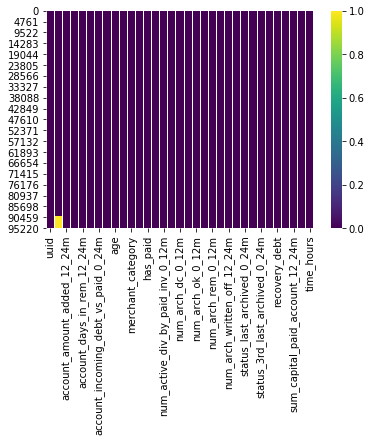

In [22]:
# Visualizing missing values across data

sns.heatmap(account_data.isnull(), cmap='viridis');

## Multivariate Analysis

In [23]:
# num_cols = [var for var in account_data.columns if account_data[var].dtype=='int64' or account_data[var].dtype=='float64']
# # num_cols = account_data._get_numeric_data().columns

# # sns.pairplot(account_data[num_cols])
# account_data[num_cols].hist(figsize=(30,30));

## Multicollinearity check

In [24]:
# print(account_data.corr(method="kendall")["default"])

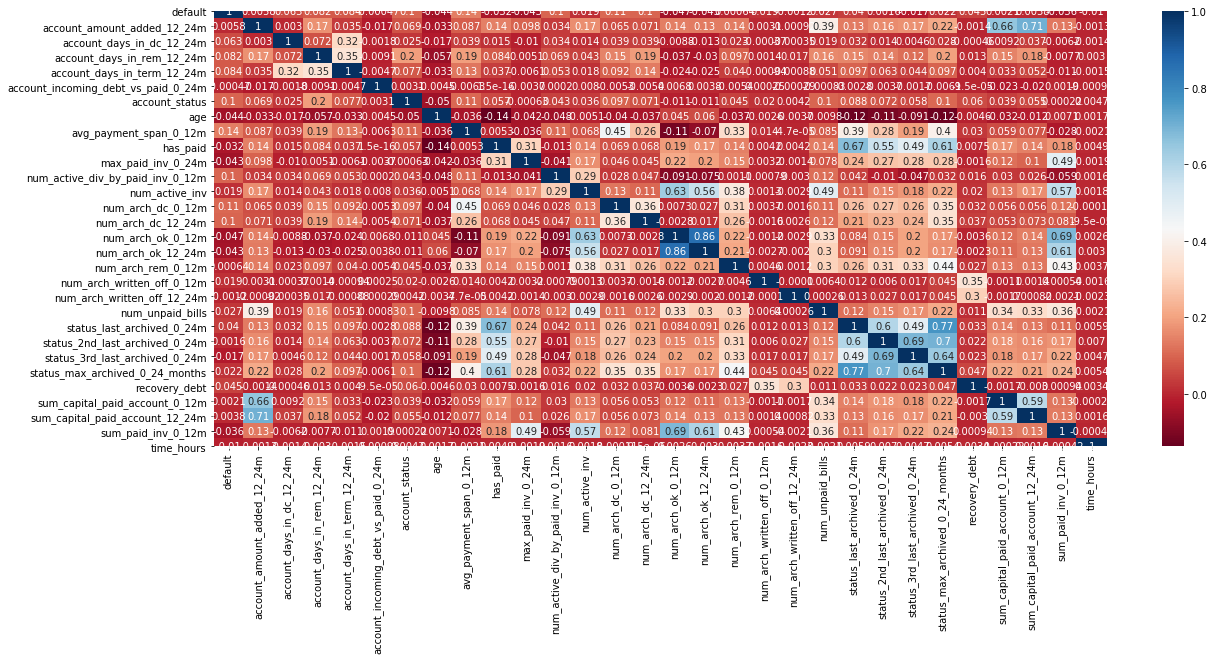

In [25]:
pyplot.figure(figsize=(20,8))
sns.heatmap(account_data.corr(),cmap='RdBu',annot=True);

In [26]:
account_data.drop(labels=['status_3rd_last_archived_0_24m'], inplace=True, axis=1)
# account_data.drop(labels=['num_arch_ok_12_24m'], inplace=True, axis=1)
# account_data.drop(labels=['status_max_archived_0_24_months'], inplace=True, axis=1)
account_data.drop(labels=['sum_capital_paid_account_12_24m'], inplace=True, axis=1)

- Removing 'num_arch_ok_12_24m' which has highest correlation of 0.89
- Roving 'status_max_archieved_0_24_months' which has high correlation with others

In [27]:
# plt.figure(figsize=(20,8))
# sns.heatmap(account_data.corr(),cmap='RdBu',annot=True);

In [28]:
# Splitting the data frame
Train = account_data[account_data['default'].isna()==False]
Test = account_data[account_data['default'].isna()]

Train.drop(labels='uuid', axis=1, inplace=True)
print(Train.shape)
print(Test.shape)

X_train, X_test, y_train, y_test = train_test_split(Train.iloc[:,1:37],Train.iloc[:,0],train_size=0.7,random_state=42, stratify=Train.iloc[:,0])

(89976, 30)
(10000, 31)


In [29]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(62983, 29)
(26993, 29)
(62983,)
(26993,)


# Model Building

## Encoding

In [30]:
# Target encoding Function: moving this to pipeline code

def target_encoder(X_train, X_test, y_train, high_categ):

    for col in high_categ:
        X_train.loc[:,col] = X_train[col].astype('category')
        X_test.loc[:,col] = X_test[col].astype('category')
    
    # Target encoding features with many levels
    te = ce.TargetEncoder()
    te.fit(X_train[high_categ],y_train)
    X_train = X_train.join(te.transform(X_train[high_categ]).add_suffix('_target'))
    X_test = X_test.join(te.transform(X_test[high_categ]).add_suffix('_target'))

    # Dropping redundant columns
    X_train.drop(high_categ, inplace= True, axis=1)
    X_test.drop(high_categ, inplace= True, axis=1)
    
    return X_train,X_test

In [31]:
# Target encoding categorical columns since they have many levels and one-hot encoding will increase the dimensions a lot, 
# furthermore, since we have large data using target encoder will not create overfitting problem.

# high_categ = ['merchant_category','merchant_group']

# X_train, X_test = target_encoder(X_train,X_test,y_train,high_categ)

## Checking Class Imbalance

In [32]:
print("Percentage of 0 class in data:", len(Train[Train['default']==0])*100/len(Train))

Percentage of 0 class in data: 98.56850715746421


In [33]:
print("Percentage of 1 class in data:", len(Train[Train['default']==1])*100/len(Train))

Percentage of 1 class in data: 1.4314928425357873


- There is clearly an extreme class imbalance problem and a regular random forest will overfit.
- We shall perform a SMOTE Oversampling combined with Random undersampling to both increase the minority class and decrease the majority class.

### SMOTE Oversampling

In [34]:
#SMOTE to create synthetic samples to balance the target classes - moving this into pipeline code

# sm = SMOTE(sampling_strategy=0.2,random_state=42)
# print("Train classes before SMOTE:",Counter(y_train))
# X_train, y_train = sm.fit_resample(X_train,y_train)
# print("Train classes after SMOTE:",Counter(y_train))
# print("Test classes with no SMOTE:", Counter(y_test))

## Model building

### Pipeline code

In [35]:
# Code to check availabe metrics
# sorted(metrics.SCORERS.keys())

In [38]:
#Training models and metrics for each
def fit_models(X_train, X_test, y_train, y_test, model_lr=False, model_rf=False,model_xgb=False, 
               model_lr_tuning=False, model_rf_xgb_tuning=False, model_rf_xgb_lda=False, model_rf_xgb_pca=False,
              model_lr_class_weight=None):
    
    # Declaring the scoring parameter
    scoring = [ 'precision', 'precision_macro', 
               'recall', 'recall_macro',
               'f1', 'f1_macro']
    # Declaring parameters
    R_STATE = 42
    FOLDS = 5
    OVER_SAMPLING_STRATEGY = 0.2
    UNDER_SAMPLING_STRATEGY = 0.5
    OVER_UNDER_SAMPLING_STRATEGY = 0.5
    
    # Creating the required scaler and over/under sampling objects
    minmax_scaler = MinMaxScaler()
    standard_scaler = StandardScaler() # adding only for PCA, remove if not required
    over = SMOTE(sampling_strategy=OVER_SAMPLING_STRATEGY, random_state=R_STATE)
    under = RandomUnderSampler(sampling_strategy=UNDER_SAMPLING_STRATEGY, random_state=R_STATE)
    over_under = SMOTEENN(sampling_strategy=OVER_UNDER_SAMPLING_STRATEGY, random_state=R_STATE)
    lda = LinearDiscriminantAnalysis(n_components=1)
    pca = PCA()
    # Declaring the preprocessor for column transforming categorical variables
    preprocessor = ColumnTransformer(transformers = [('te', ce.TargetEncoder(), ['merchant_category','merchant_group'])], remainder='passthrough')

    # Declaring the models tuples
    lr_model = ('LR', LogisticRegression(class_weight=model_lr_class_weight))
    rf_model = ('RF', RandomForestClassifier(random_state=R_STATE))
    xgb_model = ('XGB', XGBClassifier())
    # Declaring the models & other required lists
    models, names, dfs = [], [], []
    if(model_lr==True):
        models.append(lr_model)
    if(model_rf==True):
        models.append(rf_model)
    if(model_xgb==True):
        models.append(xgb_model)
        
    # Creating the KFold argument & other required lists
    kfold = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=R_STATE)
    
    for name, model in models:
        
        # Defining the steps of the pipeline
        steps_lr = [('preprocessor', preprocessor), ('minmaxscaler', minmax_scaler), ('m', model)]
        steps_lr_tuning = [('preprocessor', preprocessor), ('o', over), ('u', under), ('minmaxscaler', minmax_scaler), ('m', model)]
        steps_rf_xgb = [('preprocessor', preprocessor), ('m', model)]
        steps_rf_xgb_tuning = [('preprocessor', preprocessor), ('ou', over_under), ('m', model)]
        steps_rf_xgb_lda = [('preprocessor', preprocessor), ('lda', lda), ('ou', over_under), ('m', model)]
        steps_rf_xgb_pca = [('preprocessor', preprocessor), ('standardscaler', standard_scaler), ('pca', pca), ('ou', over_under), ('m', model)]
    
        if name =='LR':
            if model_lr==True and model_lr_tuning==True:
                steps = steps_lr_tuning
            else:
                steps = steps_lr
        else:
            if (model_rf == True or model_xgb == True) and model_rf_xgb_tuning == True:
                if model_rf_xgb_lda == True:
                    steps = steps_rf_xgb_lda
                elif model_rf_xgb_pca == True:
                    steps = steps_rf_xgb_pca
                else:
                    steps = steps_rf_xgb_tuning
            else:
                steps = steps_rf_xgb
        
        pipeline = Pipeline(steps=steps)

        print("FOR MODEL:{}\n".format(name))
        
        model = pipeline.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)        
        print("Confusion matrix:\n")
        cf_matrix = confusion_matrix(y_test, y_pred)
        print(cf_matrix)
        print("Classification report:\n",classification_report(y_test, y_pred))

        # predict probabilities
        yhat = model.predict_proba(X_test)
        # retrieve just the probabilities for the positive class
        pos_probs = yhat[:, 1]
        # calculate the no skill line as the proportion of the positive class
        non_defaults = len(y_train[y_train==1]) / len(y_train)
        # plot the no skill precision-recall curve
        pyplot.plot([0, 1], [non_defaults, non_defaults], linestyle='--', label='Non Defaults')
        # calculate model precision-recall curve
        precision, recall, _ = precision_recall_curve(y_test, pos_probs)
        auc_score = auc(recall, precision)
        print('PR AUC: %.3f' % auc_score)
        # plot the model precision-recall curve
        pyplot.plot(recall, precision, marker='.', label=name)
        # axis labels
        pyplot.xlabel('Recall')
        pyplot.ylabel('Precision')
        # show the legend
        pyplot.legend()
        # show the plot
        pyplot.show()
        
        # Using cross validation
        cv_results = cross_validate(pipeline, X_train, y_train, scoring=scoring, cv=kfold, verbose=0)
        names.append(name)
        this_df = pd.DataFrame(cv_results)
        this_df['model'] = name
        dfs.append(this_df)
        
        # Printing means of cross validation results for each model
        print('Cross validation mean results for {}'.format(name))
        av_col = this_df.mean(axis=0)
        print(av_col)
    
    # Commenting code to print the dataframe of overall results, also add return type in definition
#     cv_results_df = pd.concat(dfs,ignore_index=True)
#     return cv_results_df
    return model

FOR MODEL:LR

Confusion matrix:

[[26597    10]
 [  377     9]]
Classification report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     26607
         1.0       0.47      0.02      0.04       386

    accuracy                           0.99     26993
   macro avg       0.73      0.51      0.52     26993
weighted avg       0.98      0.99      0.98     26993

PR AUC: 0.131


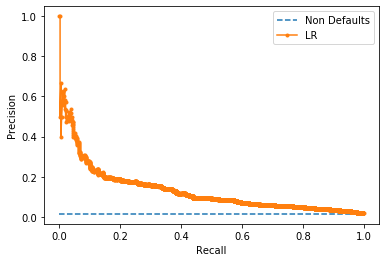

Cross validation mean results for LR
fit_time                0.587206
score_time              0.060797
test_precision          0.562381
test_precision_macro    0.774207
test_recall             0.025488
test_recall_macro       0.512559
test_f1                 0.048203
test_f1_macro           0.520494
dtype: float64
FOR MODEL:RF

Confusion matrix:

[[26592    15]
 [  352    34]]
Classification report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     26607
         1.0       0.69      0.09      0.16       386

    accuracy                           0.99     26993
   macro avg       0.84      0.54      0.57     26993
weighted avg       0.98      0.99      0.98     26993

PR AUC: 0.238


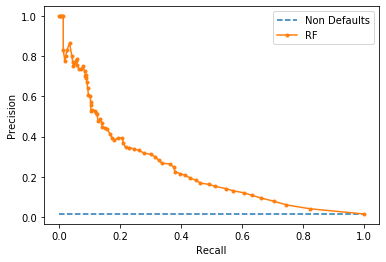

Cross validation mean results for RF
fit_time                8.203795
score_time              0.247943
test_precision          0.569433
test_precision_macro    0.777920
test_recall             0.052099
test_recall_macro       0.525752
test_f1                 0.095217
test_f1_macro           0.544040
dtype: float64
FOR MODEL:XGB

Confusion matrix:

[[26568    39]
 [  346    40]]
Classification report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     26607
         1.0       0.51      0.10      0.17       386

    accuracy                           0.99     26993
   macro avg       0.75      0.55      0.58     26993
weighted avg       0.98      0.99      0.98     26993

PR AUC: 0.210


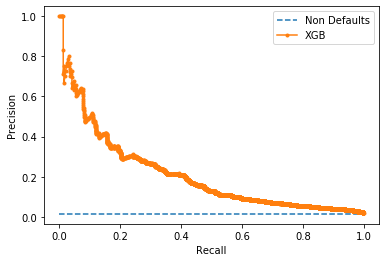

Cross validation mean results for XGB
fit_time                3.002602
score_time              0.087998
test_precision          0.479685
test_precision_macro    0.733191
test_recall             0.073192
test_recall_macro       0.535992
test_f1                 0.126004
test_f1_macro           0.559356
dtype: float64


In [45]:
# Fitting models LR, RF, XGB without over/under sampling
fit_models(X_train, X_test, y_train, y_test, model_lr=True, model_rf=True, model_xgb=True)

Steps Taken:

- Since this is a binary classification problem with extreme imbalance, for this problem we will not consider the 'Accuracy' instead concentrate on the 'F1 Score', 'precision' and 'recall'.
- To be more specific, we shall try to improve the recall which tells us how much percentage of the 'default' class, our positive class the model is able to predict accurately.
- As an initial step, we fit the below models with the following initial setting:
    - Logistic regression: Only preprocessing to encode categorical variables & using 'MinMaxScaler'. However, scaling is not actually needed since we aren't using lasso or ridge and the other models we are building are tree based which don't need scaling.
    - Random forest: Only preprocessing and modeling.
    - XGBoost: Only preprocessing and modeling.
- For our analysis, we mostly concentrate on the positive classes which are defaulters.

Observations:

- From the initial modeling results, we notice that Random forest shows better precision results compared to others.
- The PR AUC score of Random forest is the highest at 0.238.

FOR MODEL:LR

Confusion matrix:

[[24284  2323]
 [  161   225]]
Classification report:
               precision    recall  f1-score   support

         0.0       0.99      0.91      0.95     26607
         1.0       0.09      0.58      0.15       386

    accuracy                           0.91     26993
   macro avg       0.54      0.75      0.55     26993
weighted avg       0.98      0.91      0.94     26993

PR AUC: 0.140


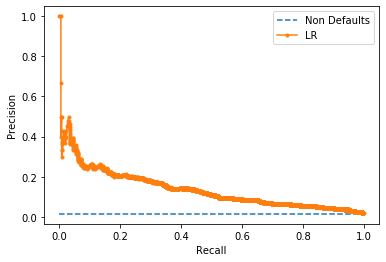

Cross validation mean results for LR
fit_time                1.044068
score_time              0.108671
test_precision          0.089321
test_precision_macro    0.541360
test_recall             0.581995
test_recall_macro       0.747893
test_f1                 0.154846
test_f1_macro           0.553388
dtype: float64


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('te', TargetEncoder(),
                                                  ['merchant_category',
                                                   'merchant_group'])])),
                ('o', SMOTE(random_state=42, sampling_strategy=0.2)),
                ('u',
                 RandomUnderSampler(random_state=42, sampling_strategy=0.5)),
                ('minmaxscaler', MinMaxScaler()), ('m', LogisticRegression())])

In [76]:
# Fitting LR model with over/under sampling
fit_models(X_train, X_test, y_train, y_test, model_lr=True, model_rf=False, model_xgb=False, model_lr_tuning=True)

FOR MODEL:RF

Confusion matrix:

[[26472   135]
 [  321    65]]
Classification report:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     26607
         1.0       0.33      0.17      0.22       386

    accuracy                           0.98     26993
   macro avg       0.66      0.58      0.61     26993
weighted avg       0.98      0.98      0.98     26993

PR AUC: 0.191


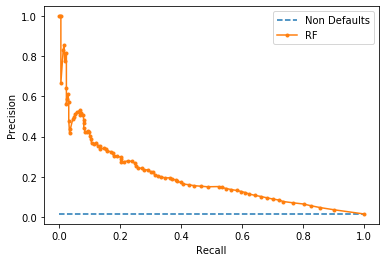

Cross validation mean results for RF
fit_time                139.962963
score_time                0.258794
test_precision            0.237228
test_precision_macro      0.612310
test_recall               0.126378
test_recall_macro         0.560201
test_f1                   0.164039
test_f1_macro             0.577368
dtype: float64


In [47]:
# Fitting RF with over/under sampling and withnout lda or pca
fit_models(X_train, X_test, y_train, y_test, model_rf=True, model_rf_xgb_tuning=True)

FOR MODEL:RF

Confusion matrix:

[[23453  3154]
 [  201   185]]
Classification report:
               precision    recall  f1-score   support

         0.0       0.99      0.88      0.93     26607
         1.0       0.06      0.48      0.10       386

    accuracy                           0.88     26993
   macro avg       0.52      0.68      0.52     26993
weighted avg       0.98      0.88      0.92     26993

PR AUC: 0.249


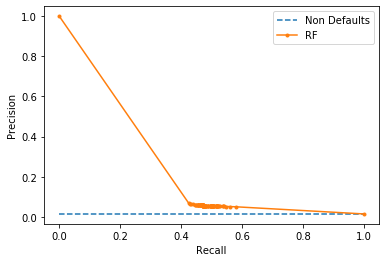

Cross validation mean results for RF
fit_time                4.094543
score_time              0.187200
test_precision          0.055730
test_precision_macro    0.523665
test_recall             0.486667
test_recall_macro       0.683468
test_f1                 0.100004
test_f1_macro           0.516313
dtype: float64


In [48]:
# Fitting RF with over/under sampling and with lda
fit_models(X_train, X_test, y_train, y_test, model_rf=True, model_rf_xgb_tuning=True, model_rf_xgb_lda=True)

FOR MODEL:RF

Confusion matrix:

[[25757   850]
 [  268   118]]
Classification report:
               precision    recall  f1-score   support

         0.0       0.99      0.97      0.98     26607
         1.0       0.12      0.31      0.17       386

    accuracy                           0.96     26993
   macro avg       0.56      0.64      0.58     26993
weighted avg       0.98      0.96      0.97     26993

PR AUC: 0.112


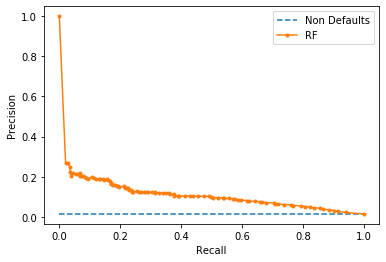

Cross validation mean results for RF
fit_time                180.795578
score_time                0.289414
test_precision            0.125403
test_precision_macro      0.557795
test_recall               0.341430
test_recall_macro         0.653359
test_f1                   0.183150
test_f1_macro             0.580363
dtype: float64


In [49]:
# Fitting RF with over/under sampling and with standard scaler followed by pca
fit_models(X_train, X_test, y_train, y_test, model_rf=True, model_rf_xgb_tuning=True, model_rf_xgb_pca=True)

FOR MODEL:XGB

Confusion matrix:

[[26513    94]
 [  335    51]]
Classification report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     26607
         1.0       0.35      0.13      0.19       386

    accuracy                           0.98     26993
   macro avg       0.67      0.56      0.59     26993
weighted avg       0.98      0.98      0.98     26993

PR AUC: 0.184


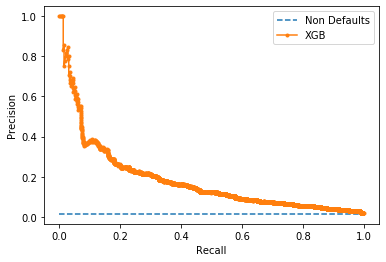

Cross validation mean results for XGB
fit_time                140.088052
score_time                0.161513
test_precision            0.289346
test_precision_macro      0.638233
test_recall               0.105328
test_recall_macro         0.550780
test_f1                   0.154112
test_f1_macro             0.572883
dtype: float64


In [50]:
# Fitting XGB with over/under sampling and withnout lda or pca
fit_models(X_train, X_test, y_train, y_test, model_xgb=True, model_rf_xgb_tuning=True)

FOR MODEL:XGB

Confusion matrix:

[[23747  2860]
 [  202   184]]
Classification report:
               precision    recall  f1-score   support

         0.0       0.99      0.89      0.94     26607
         1.0       0.06      0.48      0.11       386

    accuracy                           0.89     26993
   macro avg       0.53      0.68      0.52     26993
weighted avg       0.98      0.89      0.93     26993

PR AUC: 0.114


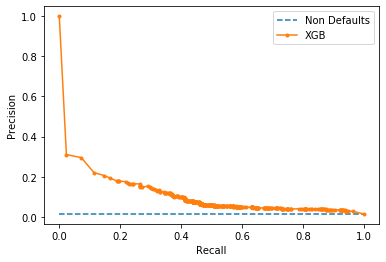

Cross validation mean results for XGB
fit_time                2.973603
score_time              0.146200
test_precision          0.056657
test_precision_macro    0.524138
test_recall             0.486642
test_recall_macro       0.684414
test_f1                 0.101476
test_f1_macro           0.517586
dtype: float64


In [51]:
# Fitting XBG with over/under sampling and with lda
fit_models(X_train, X_test, y_train, y_test, model_xgb=True, model_rf_xgb_tuning=True, model_rf_xgb_lda=True)

FOR MODEL:XGB

Confusion matrix:

[[25331  1276]
 [  231   155]]
Classification report:
               precision    recall  f1-score   support

         0.0       0.99      0.95      0.97     26607
         1.0       0.11      0.40      0.17       386

    accuracy                           0.94     26993
   macro avg       0.55      0.68      0.57     26993
weighted avg       0.98      0.94      0.96     26993

PR AUC: 0.120


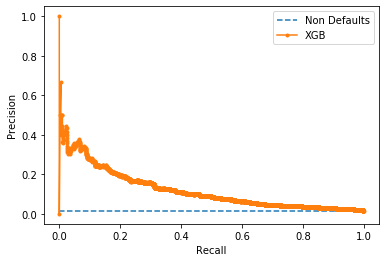

Cross validation mean results for XGB
fit_time                149.962267
score_time                0.188778
test_precision            0.108256
test_precision_macro      0.549616
test_recall               0.403493
test_recall_macro         0.677584
test_f1                   0.170642
test_f1_macro             0.570785
dtype: float64


In [52]:
# Fitting XGB with over/under sampling and with standard scaler followed by pca
fit_models(X_train, X_test, y_train, y_test, model_xgb=True, model_rf_xgb_tuning=True, model_rf_xgb_pca=True)

Steps Taken:

- In the next step we shall include the LDA and over, under sampling techniques as part of our analysis.
- LDA is to reduce the number of features and over, under sampling techniques are used to correct the imbalance in the data.

Observations:

For each of the models the observations are:

- Logistic regression: using over, under sampling improved the recall from 0.02 to 0.575 which is great. However, we see a drop in the precision.
- Random forest: using only over, under sampling without lda give us f1-score of 0.22 with precision 0.33 and 0.17. If our analysis was to concentrate both on improving the precision and recall we can skip on the lda. On the other hand, when lda is actually used we see that the recall is 0.48 and precision 0.05 with f1-score of 0.10
- XGBoost:

In [61]:
# Hyperparameter tuning random forest
scoring = [ 'precision', 'precision_macro', 
           'recall', 'recall_macro',
           'f1', 'f1_macro']

# Declaring parameters
R_STATE = 42
FOLDS = 3
REPEATS = 2
OVER_UNDER_SAMPLING_STRATEGY = 0.5

over = RandomOverSampler(sampling_strategy=0.2, random_state=R_STATE)
under = RandomUnderSampler(sampling_strategy=0.5, random_state=R_STATE)

# Creating the required scaler and over/under sampling objects

# over_under = SMOTEENN(sampling_strategy=OVER_UNDER_SAMPLING_STRATEGY, random_state=R_STATE)

# Declaring the preprocessor for column transforming categorical variables

preprocessor = ColumnTransformer(transformers = [('te', ce.TargetEncoder(), ['merchant_category','merchant_group'])], remainder='passthrough')

# Creating the KFold argument & other required lists
kfold = RepeatedStratifiedKFold(n_splits=FOLDS, n_repeats=REPEATS, random_state=R_STATE)

# Defining the steps of the pipeline
# steps = [('preprocessor', preprocessor), ('ou',over_under), ('rf', RandomForestClassifier(random_state=R_STATE))]

steps = [('preprocessor', preprocessor), ('o',over),('u',under), ('rf', RandomForestClassifier(random_state=R_STATE))]

# Defing the param grid
param_grid = {
    "rf__max_depth": [80, 90],
    "rf__min_samples_leaf": [3, 4],
    "rf__min_samples_split": [8, 10],
    "rf__n_estimators": [200, 500, 600],
    "rf__class_weight":[{0:0.60,1:0.40},{0:0.40,1:0.60},'balanced']
    
    }

pipeline = Pipeline(steps=steps)

pipe_cv = GridSearchCV(pipeline,
                  param_grid=param_grid,
                  cv = kfold, n_jobs = -1, verbose = 2)


pipe_cv.fit(X_train, y_train)
print('Best parameters are:\n', pipe_cv.best_params_)
model = pipe_cv.best_estimator_

Fitting 6 folds for each of 72 candidates, totalling 432 fits
Best parameters are:
 {'rf__class_weight': {0: 0.6, 1: 0.4}, 'rf__max_depth': 80, 'rf__min_samples_leaf': 3, 'rf__min_samples_split': 8, 'rf__n_estimators': 500}


Confusion matrix:

[[26216   391]
 [  261   125]]
Classification report:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     26607
         1.0       0.24      0.32      0.28       386

    accuracy                           0.98     26993
   macro avg       0.62      0.65      0.63     26993
weighted avg       0.98      0.98      0.98     26993

PR AUC: 0.227


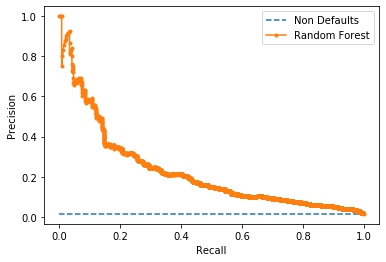

Cross validation mean results for Random Forest
fit_time                6.201962
score_time              0.798577
test_precision          0.224588
test_precision_macro    0.606142
test_recall             0.149120
test_recall_macro       0.570799
test_f1                 0.179087
test_f1_macro           0.584584
dtype: float64


In [77]:
# Evaluating results
y_pred = model.predict(X_test)        
print("Confusion matrix:\n")
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)
print("Classification report:\n",classification_report(y_test, y_pred))

# predict probabilities
yhat = model.predict_proba(X_test)
# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]
# calculate the no skill line as the proportion of the positive class
non_defaults = len(y_train[y_train==1]) / len(y_train)
# plot the no skill precision-recall curve
pyplot.plot([0, 1], [non_defaults, non_defaults], linestyle='--', label='Non Defaults')
# calculate model precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, pos_probs)
auc_score = auc(recall, precision)
print('PR AUC: %.3f' % auc_score)
# plot the model precision-recall curve
pyplot.plot(recall, precision, marker='.', label='Random Forest')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Using cross validation
cv_results = cross_validate(pipeline, X_train, y_train, scoring=scoring, cv=kfold, verbose=0)
this_df = pd.DataFrame(cv_results)

# Printing means of cross validation results for each model
print('Cross validation mean results for {}'.format('Random Forest'))
av_col = this_df.mean(axis=0)
print(av_col)

FOR MODEL:LR

Confusion matrix:

[[18188  8419]
 [   39   347]]
Classification report:
               precision    recall  f1-score   support

         0.0       1.00      0.68      0.81     26607
         1.0       0.04      0.90      0.08       386

    accuracy                           0.69     26993
   macro avg       0.52      0.79      0.44     26993
weighted avg       0.98      0.69      0.80     26993

PR AUC: 0.130


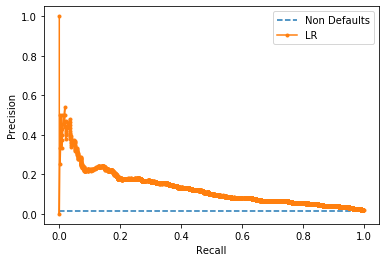

Cross validation mean results for LR
fit_time                0.517011
score_time              0.053652
test_precision          0.039011
test_precision_macro    0.518308
test_recall             0.886888
test_recall_macro       0.784724
test_f1                 0.074732
test_f1_macro           0.442618
dtype: float64


In [39]:
# Hyperparameter tuning lr model

final_lr_model = fit_models(X_train, X_test, y_train, y_test, model_lr=True, 
                            model_rf=False, model_xgb=False, model_lr_tuning=True, model_lr_class_weight= {0:0.20, 1:0.80})

Conclusion:

- Based on the analysis, we focus on optimising the recall metrics since we are focused on getting the defaulters right and ready to compromise on misclassifying few of the Non-defaulters as defaulters. However, we are okay with this considering the fact that there is huge class imbalance.
- The initial analysis suggests that logistic regression gives us a better recall compared to the random forest and xgb. Furthermore, random forest does not give better recall after hyperparameter tuning. On the other hand, it is to be noted that if the business wants to have a balance between recall and precision this approach can be taken which gives us the highest f1-score of 0.28 for defaulters class.
- After hyperparameter tuning of the lr model we could get a recall of 0.88.

In [40]:
Test.head()

,uuid,default,account_amount_added_12_24m,account_days_in_dc_12_24m,account_days_in_rem_12_24m,account_days_in_term_12_24m,account_incoming_debt_vs_paid_0_24m,account_status,age,avg_payment_span_0_12m,...,num_arch_written_off_0_12m,num_arch_written_off_12_24m,num_unpaid_bills,status_last_archived_0_24m,status_2nd_last_archived_0_24m,status_max_archived_0_24_months,recovery_debt,sum_capital_paid_account_0_12m,sum_paid_inv_0_12m,time_hours
89976,6f6e6c6a-2081-4e6b-8eb3-4fd89b54b2d7,NaN,0,0.0,0.0,0.0,0.009135,1.0,20,6.400000,...,0.0,0.0,1,1,1,1,0,8815,27157,19.895556
89977,f6f6d9f3-ef2b-4329-a388-c6a687f27e70,NaN,0,0.0,0.0,0.0,1.331292,1.0,64,17.971473,...,0.0,0.0,0,0,0,0,0,0,0,0.236667
89978,e9c39869-1bc5-4375-b627-a2df70b445ea,NaN,50956,0.0,77.0,0.0,0.000000,1.0,28,12.500000,...,0.0,0.0,0,1,1,3,0,36163,93760,20.332778
89979,6beb88a3-9641-4381-beb6-c9a208664dd0,NaN,35054,0.0,0.0,0.0,0.000000,1.0,31,41.000000,...,0.0,0.0,0,2,0,2,0,62585,1790,6.201111
89980,bb89b735-72fe-42a4-ba06-d63be0f4ca36,NaN,0,0.0,0.0,0.0,0.000000,1.0,30,17.971473,...,0.0,0.0,0,0,0,0,0,14295,0,8.451111


# Serializing model and predicting default probabilities

In [41]:
# Saving model to disk
pickle.dump(final_lr_model, open('model.pkl', 'wb'))

In [42]:
# Testing our saved model

model = pickle.load(open('model.pkl','rb'))

In [43]:
# Predicting default probabilities
X_test_input = Test.iloc[:,2:32]
y_test_input_pred = model.predict_proba(X_test_input)
final_results = pd.DataFrame({'uuid':Test.iloc[:,0],'default':y_test_input_pred[:,1]})
final_results.reset_index(drop=True, inplace=True)
final_results.to_csv(r'result.csv')
final_results

,uuid,default
0,6f6e6c6a-2081-4e6b-8eb3-4fd89b54b2d7,0.408905
1,f6f6d9f3-ef2b-4329-a388-c6a687f27e70,0.544777
2,e9c39869-1bc5-4375-b627-a2df70b445ea,0.032656
3,6beb88a3-9641-4381-beb6-c9a208664dd0,0.813705
4,bb89b735-72fe-42a4-ba06-d63be0f4ca36,0.716974
...,...,...
9995,5c03bc63-ea65-4ffd-aa7b-95ea9a46db34,0.148242
9996,f8db22f4-9819-420c-abbc-9ddf1843176e,0.505501
9997,b22e21ea-b1b2-4df3-b236-0ff6d5fdc0d8,0.981852
9998,bafcab15-9898-479c-b729-c9dda7edb78f,0.355936


In [44]:
Test.columns

Index(['uuid', 'default', 'account_amount_added_12_24m',
       'account_days_in_dc_12_24m', 'account_days_in_rem_12_24m',
       'account_days_in_term_12_24m', 'account_incoming_debt_vs_paid_0_24m',
       'account_status', 'age', 'avg_payment_span_0_12m', 'merchant_category',
       'merchant_group', 'has_paid', 'max_paid_inv_0_24m',
       'num_active_div_by_paid_inv_0_12m', 'num_active_inv',
       'num_arch_dc_0_12m', 'num_arch_dc_12_24m', 'num_arch_ok_0_12m',
       'num_arch_ok_12_24m', 'num_arch_rem_0_12m',
       'num_arch_written_off_0_12m', 'num_arch_written_off_12_24m',
       'num_unpaid_bills', 'status_last_archived_0_24m',
       'status_2nd_last_archived_0_24m', 'status_max_archived_0_24_months',
       'recovery_debt', 'sum_capital_paid_account_0_12m', 'sum_paid_inv_0_12m',
       'time_hours'],
      dtype='object')

In [45]:
Test.dtypes

uuid                                    object
default                                float64
account_amount_added_12_24m              int64
account_days_in_dc_12_24m              float64
account_days_in_rem_12_24m             float64
account_days_in_term_12_24m            float64
account_incoming_debt_vs_paid_0_24m    float64
account_status                         float64
age                                      int64
avg_payment_span_0_12m                 float64
merchant_category                       object
merchant_group                          object
has_paid                                 int32
max_paid_inv_0_24m                     float64
num_active_div_by_paid_inv_0_12m       float64
num_active_inv                           int64
num_arch_dc_0_12m                        int64
num_arch_dc_12_24m                       int64
num_arch_ok_0_12m                        int64
num_arch_ok_12_24m                       int64
num_arch_rem_0_12m                       int64
num_arch_writ

In [46]:
Test.iloc[2,:]

uuid                                   e9c39869-1bc5-4375-b627-a2df70b445ea
default                                                                 NaN
account_amount_added_12_24m                                           50956
account_days_in_dc_12_24m                                                 0
account_days_in_rem_12_24m                                               77
account_days_in_term_12_24m                                               0
account_incoming_debt_vs_paid_0_24m                                       0
account_status                                                            1
age                                                                      28
avg_payment_span_0_12m                                                 12.5
merchant_category                                 Diversified entertainment
merchant_group                                                Entertainment
has_paid                                                                  1
max_paid_inv

In [52]:
data = {
'account_amount_added_12_24m':[50956],
'account_days_in_dc_12_24m':[0],
'account_days_in_rem_12_24m':[77],
'account_days_in_term_12_24m':[0],
'account_incoming_debt_vs_paid_0_24m':[0],
'account_status':[1],
'age':[28],
'avg_payment_span_0_12m':[12.5],
'merchant_category':['Diversified entertainment'],
'merchant_group':['Entertainment'],
'has_paid':[1],
'max_paid_inv_0_24m':[91980],
'num_active_div_by_paid_inv_0_12m':[0],
'num_active_inv':[0],
'num_arch_dc_0_12m':[0],
'num_arch_dc_12_24m':[1],
'num_arch_ok_0_12m':[2],
'num_arch_ok_12_24m':[7],
'num_arch_rem_0_12m':[0],
'num_arch_written_off_0_12m':[0],
'num_arch_written_off_12_24m':[0],
'num_unpaid_bills':[0],
'status_last_archived_0_24m':[1],
'status_2nd_last_archived_0_24m':[1],
'status_max_archived_0_24_months':[3],
'recovery_debt':[0],
'sum_capital_paid_account_0_12m':[36163],
'sum_paid_inv_0_12m':[93760],
'time_hours':[20.3328]
}
df = pd.DataFrame(data)

prediction = model.predict_proba(df)
# output = round(prediction[0], 8)
print(prediction[:,1])

[0.03265571]


In [56]:
prediction[:,1][0]

0.032655706495467

In [69]:
df = pd.DataFrame([{
  "account_amount_added_12_24m": 50956,
  "account_days_in_dc_12_24m": 0,
  "account_days_in_rem_12_24m": 77,
  "account_days_in_term_12_24m": 0,
  "account_incoming_debt_vs_paid_0_24m": 0,
  "account_status": 1,
  "age": 28,
  "avg_payment_span_0_12m": 12.5,
  "merchant_category": "Diversified entertainment",
  "merchant_group": "Entertainment",
  "has_paid": 1,
  "max_paid_inv_0_24m": 91980,
  "num_active_div_by_paid_inv_0_12m": 0,
  "num_active_inv": 0,
  "num_arch_dc_0_12m": 0,
  "num_arch_dc_12_24m": 1,
  "num_arch_ok_0_12m": 2,
  "num_arch_ok_12_24m": 7,
  "num_arch_rem_0_12m": 0,
  "num_arch_written_off_0_12m": 0,
  "num_arch_written_off_12_24m": 0,
  "num_unpaid_bills": 0,
  "status_last_archived_0_24m": 1,
  "status_2nd_last_archived_0_24m": 1,
  "status_max_archived_0_24_months": 3,
  "recovery_debt": 0,
  "sum_capital_paid_account_0_12m": 36163,
  "sum_paid_inv_0_12m": 93760,
  "time_hours": 20.3328
}], index=[0])

In [72]:
df.shape

(1, 29)

In [70]:
prediction = model.predict_proba(df)

In [71]:
if(prediction[:,1][0]>0.5):
    print("This user is a potential defauter")
else:
    print("This user is NOT a potential defaulter")

This user is NOT a potential defaulter
